# Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path1= "/content/drive/MyDrive/APESTGTSTONK/assets/clean_v1_btc_headlines.csv"
path2= "/content/drive/MyDrive/APESTGTSTONK/assets/BTC_USD_withTechIndicators.csv" 

Mounted at /content/drive/


In [ ]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
btc_headlines= pd.read_csv(path1)
btc_prices= pd.read_csv(path2)

# [EDA 1] Headlines

## Basic EDA

In [ ]:
btc_headlines.tail()

,Unnamed: 0,date,headline,headline_clean
246946,229463,20210817,"Solana Captures Fresh All-Time Highs, SOL Join...",solana capture fresh all time high sol join th...
246947,229464,20210817,Polygon Enters Into Africa With Quidax. Quidax...,polygon enters into africa with quidax quidax ...
246948,229465,20210817,Bank of Ghana Urged to Resist Developing a CBD...,bank of ghana urged to resist developing a cbd...
246949,229466,20210817,Venezuelan Buys Apartment Using Tether as Real...,venezuelan buy apartment using tether a real e...
246950,229467,20210817,Former Zcash Developer to Lead Twitterâ€™s Dec...,former zcash developer to lead twitter s decen...


In [ ]:
btc_headlines.date= [str(w) for w in btc_headlines.date]


In [ ]:
#Word Cloud By Year...

def headline_year(year):
    headline_year= btc_headlines[btc_headlines.date.str.startswith(str(year))]
    headline_year= " ".join(str(row) for row in headline_year['headline_clean'])
    return headline_year

df_2013=  btc_headlines[btc_headlines.date.str.startswith("2013")]
df_2014=  btc_headlines[btc_headlines.date.str.startswith("2014")]
df_2015=  btc_headlines[btc_headlines.date.str.startswith("2015")]
df_2016=  btc_headlines[btc_headlines.date.str.startswith("2016")]
df_2017=  btc_headlines[btc_headlines.date.str.startswith("2017")]
df_2018=  btc_headlines[btc_headlines.date.str.startswith("2018")]
df_2019=  btc_headlines[btc_headlines.date.str.startswith("2019")]
df_2020=  btc_headlines[btc_headlines.date.str.startswith("2020")]
df_2021=  btc_headlines[btc_headlines.date.str.startswith("2021")]


headline_2013= headline_year(2013)
headline_2014= headline_year(2014)
headline_2015= headline_year(2015)
headline_2016= headline_year(2016)
headline_2017= headline_year(2017)
headline_2018= headline_year(2018)
headline_2019= headline_year(2019)
headline_2020= headline_year(2020)
headline_2021= headline_year(2021)


all_headlines= {"text":[headline_2013, headline_2014, headline_2015,headline_2016, headline_2017 , headline_2018
                        ,headline_2019,headline_2020,headline_2021 ]}
all_headlines= pd.DataFrame(all_headlines, index= ["2013", "2014", "2015","2016", "2017", "2018" ,"2019", "2020", "2021"  ])
labels= ["2013", "2014", "2015","2016", "2017", "2018" ,"2019", "2020", "2021"  ]
all_headlines["year"]= labels
all_headlines.head()

,text,year
2013,beginner guide to diamond dmd is bitcoin in a ...,2013
2014,bitcoin cash price technical analysis bchusd e...,2014
2015,brexit effect on uk bitcoin taxation exchange ...,2015
2016,china ico ban spark startup exodus to japan fo...,2016
2017,bitcoin break a exchange break volume record w...,2017


In [ ]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') #You can remove stop words using CountVectorizer as well
data_cv = cv.fit_transform(all_headlines.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = all_headlines.index
data_dtm

data = data_dtm.transpose()
#transpose changes columns to rows and rows to columns
print(data)

            2013  2014  2015  2016  2017  2018  2019  2020  2021
aaaaaand       0     0     0     0     0     1     0     0     0
aaaaannnnd     0     0     0     1     0     0     0     0     0
aaatrade       0     0     0     0     0     1     0     0     0
aachen         0     0     0     0     0     1     0     0     0
aads           0     0     0     0     0     1     0     0     0
...          ...   ...   ...   ...   ...   ...   ...   ...   ...
zygot          0     1     0     0     2     0     3     0     0
zymbit         0     0     0     0     0     1     0     0     0
zymkey         0     0     0     0     0     1     0     0     0
zynga          0     0     1     2     1     1     3     0     0
zyskind        0     0     0     0     1     1     1     0     0

[49977 rows x 9 columns]


In [ ]:
# Top 30 words by each category 
top_dict = {}
for c in data.columns: #for each review data type, we see which word is most frequently appeared in which review category 
    top = data[c].sort_values(ascending=False).head(5)
    top_dict[c]= list(zip(top.index, top.values))

# Counter makes it easy to count values in a list see more on https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter

# Let's first pull out the top 30 words for each category
words = []
for category in data.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)

print(words)

['bitcoin', 'crypto', 'price', 'blockchain', 'ethereum', 'bitcoin', 'price', 'crypto', 'blockchain', 'analysis', 'bitcoin', 'crypto', 'blockchain', 'price', 'new', 'bitcoin', 'blockchain', 'crypto', 'price', 'new', 'bitcoin', 'crypto', 'blockchain', 'price', 'cryptocurrency', 'bitcoin', 'crypto', 'blockchain', 'price', 'cryptocurrency', 'bitcoin', 'crypto', 'blockchain', 'price', 'new', 'bitcoin', 'crypto', 'market', 'blockchain', 'new', 'bitcoin', 'crypto', 'say', 'market', 'bank']


In [ ]:
# If more than half of the categories (6) have it as a top word, exclude it from the list 
common = [word for word, count in Counter(words).most_common() ]
common

['bitcoin',
 'crypto',
 'blockchain',
 'price',
 'new',
 'cryptocurrency',
 'market',
 'ethereum',
 'analysis',
 'say',
 'bank']

In [ ]:
print(headlines_2021)

NameError: ignored

In [ ]:
df_2013.shape

(2527, 4)

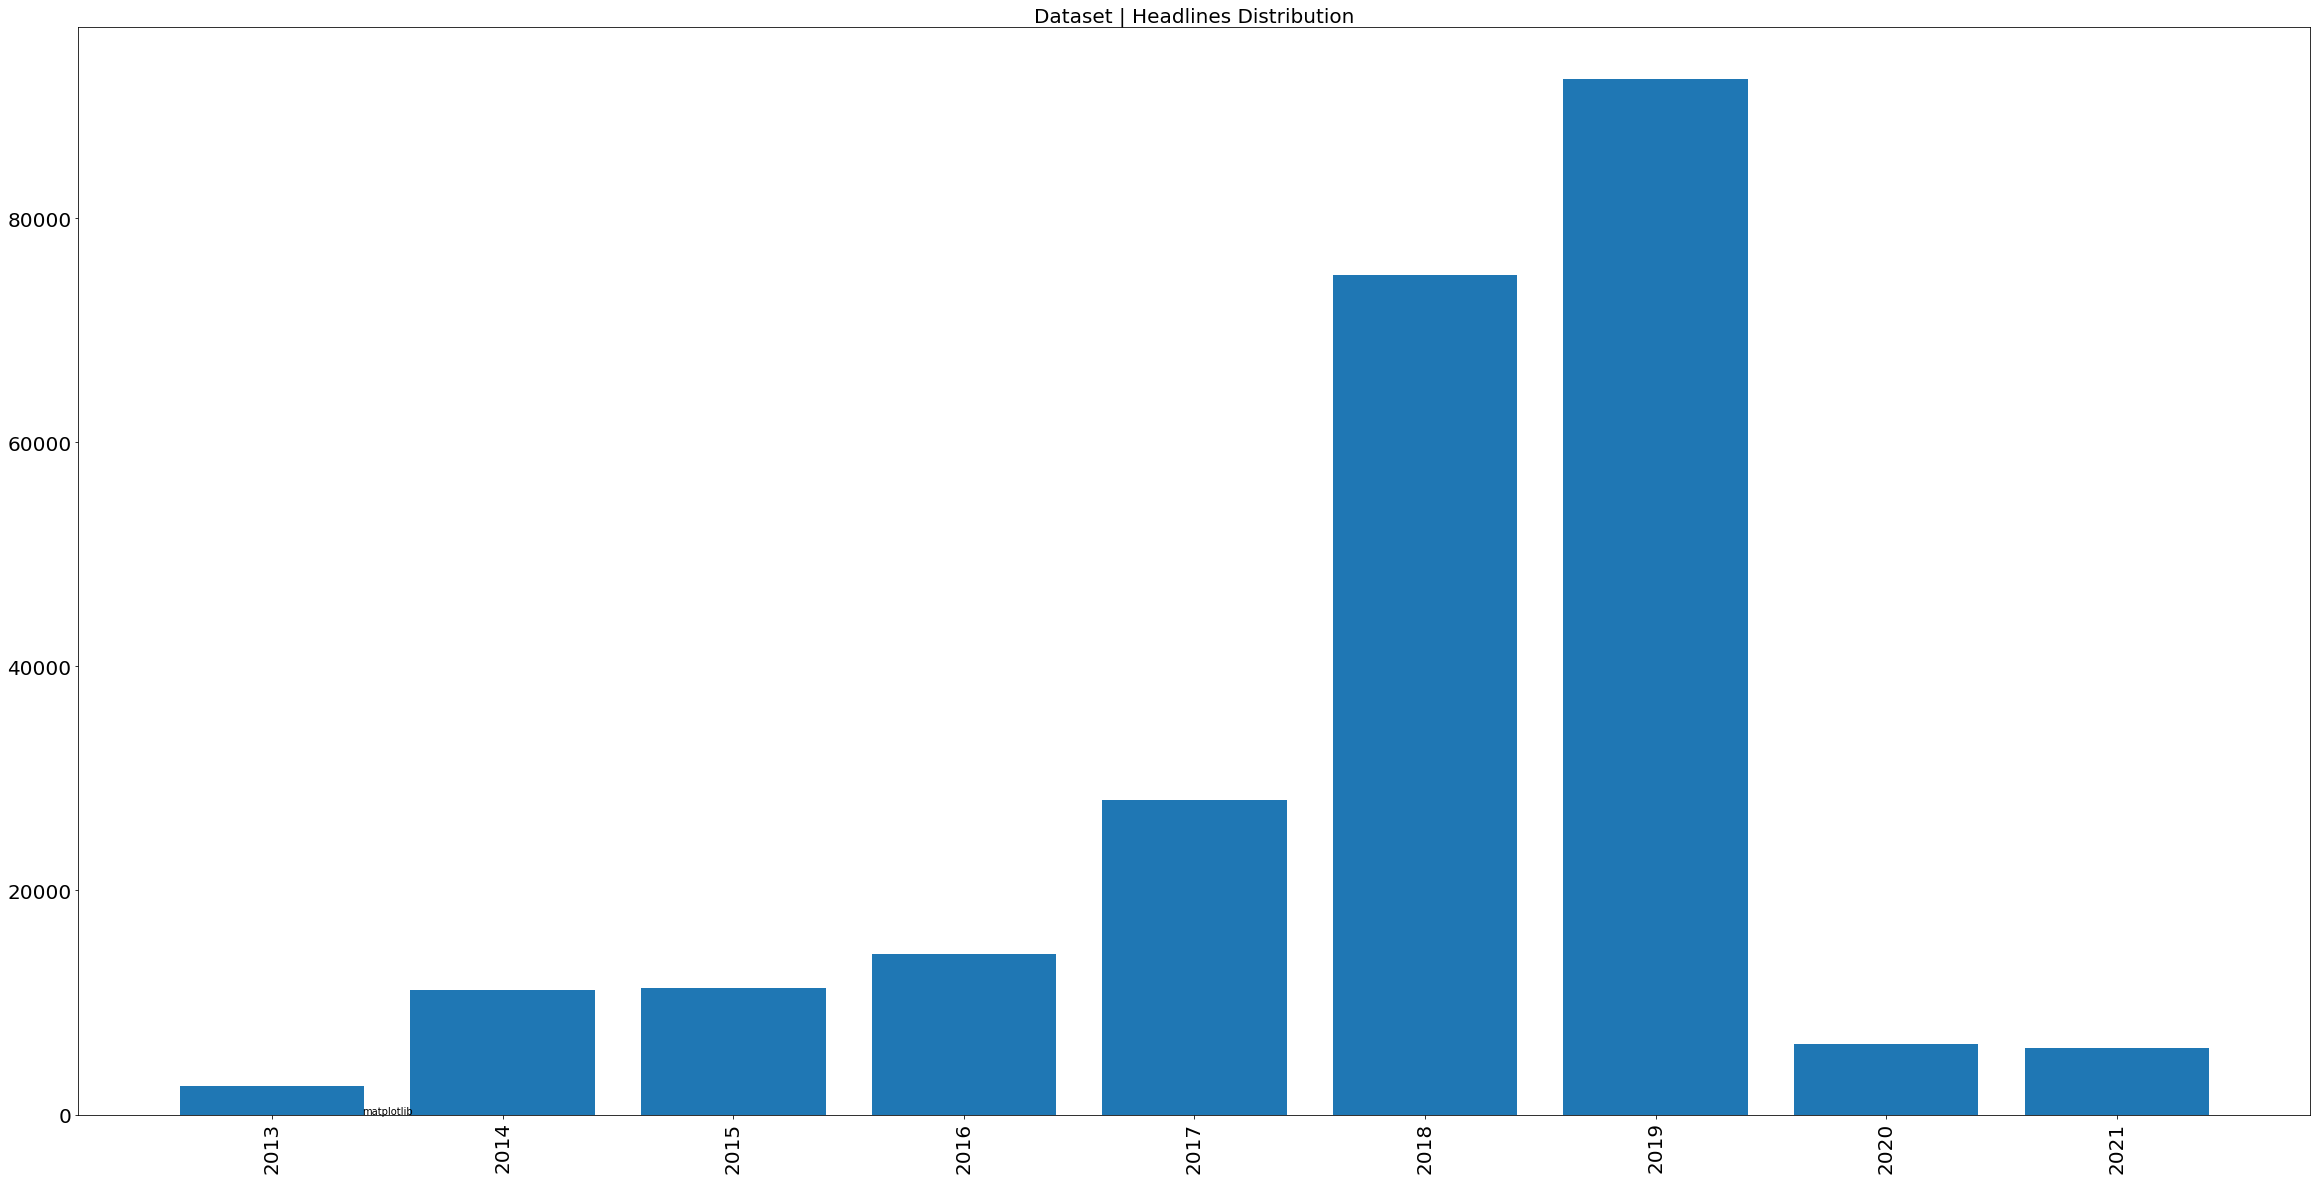

In [ ]:
#understanding data

value_counts= [df_2013.shape[0], df_2014.shape[0], df_2015.shape[0], df_2016.shape[0], df_2017.shape[0], df_2018.shape[0], df_2019.shape[0], df_2020.shape[0], df_2021.shape[0]]
plt.bar(data_dtm.index.astype('str'), value_counts)
plt.xticks(fontsize= 20, rotation=90)
plt.yticks(fontsize=20)
plt.text(0.5, 0.5, 'matplotlib', horizontalalignment='center')
plt.title("Dataset | Headlines Distribution", fontsize= 20)
plt.rcParams["figure.figsize"] = (10,7)

plt.show()

## Drawing Word Clouds

In [ ]:
!conda install --yes -c conda-forge wordcloud

/bin/bash: conda: command not found


In [ ]:
#import required libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
headlines= " ".join(str(row) for row in btc_headlines['headline_clean'])


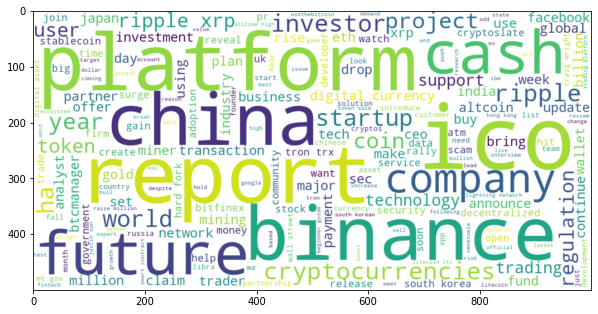

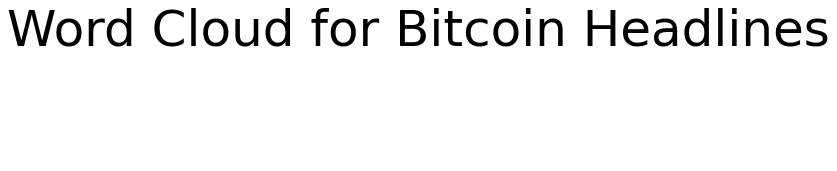

In [ ]:
# Create and generate a word cloud image:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

#add new stop words/
add_stop_words=["btc", "news", "bitcoins", "exchange", "launch", "coinbase", "beincrypto"]
stop_words= text.ENGLISH_STOP_WORDS.union(common, add_stop_words)

wordcloud = WordCloud(stopwords= stop_words, background_color="white", width=1000, height=500).generate(headlines)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure( figsize=(5,2) )
plt.title("Word Cloud for Bitcoin Headlines", fontsize= 50)
plt.axis("off")
plt.show()


In [ ]:
wc = WordCloud(stopwords= stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [40, 20]

# Create subplots for each year
for index, category in enumerate(data.columns):
    wc.generate(all_headlines.text[category])
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(labels[index], fontsize= 50)
    
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# [EDA 2] Technical 

## Basic EDA

In [ ]:
btc_prices.tail(10)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,SMA14,RSI,On Balance Volume
1817,1817,2021-07-29,39995.453125,40593.070313,39352.058594,40008.421875,40008.421875,2.716715e+10,34269.527483,70.546527,1.755767e+12
1818,1818,2021-07-30,40027.484375,42235.546875,38397.355469,42235.546875,42235.546875,3.307278e+10,35041.956613,75.016084,1.788840e+12
1819,1819,2021-07-31,42196.304688,42231.449219,41110.832031,41626.195313,41626.195313,2.580285e+10,35762.894252,71.805431,1.763037e+12
1820,1820,2021-08-01,41460.843750,42541.679688,39540.941406,39974.894531,39974.894531,2.668844e+10,36347.043108,63.832407,1.736348e+12
1821,1821,2021-08-02,39907.261719,40419.179688,38746.347656,39201.945313,39201.945313,2.559527e+10,36945.908343,60.448925,1.710753e+12
1822,1822,2021-08-03,39178.402344,39750.031250,37782.050781,38152.980469,38152.980469,2.618983e+10,37542.024972,56.102804,1.684563e+12
1823,1823,2021-08-04,38213.332031,39952.296875,37589.164063,39747.503906,39747.503906,2.537256e+10,38087.511440,60.725340,1.709936e+12
1824,1824,2021-08-05,39744.515625,41341.933594,37458.003906,40869.554688,40869.554688,3.518503e+10,38698.686384,63.627882,1.745121e+12
1825,1825,2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,3.822648e+10,39358.325614,68.041353,1.783347e+12
1826,1826,2021-08-07,42783.437500,43901.675781,42684.074219,43515.773438,43515.773438,4.021595e+10,40017.134766,69.474065,1.823563e+12


In [ ]:
btc_prices.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,SMA14,RSI,On Balance Volume
count,1827.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03,1782.000000,1806.000000,1.827000e+03
mean,913.000000,11340.264589,11668.001096,10981.167298,11362.414728,11362.414728,1.805935e+10,11325.491466,54.823513,5.303421e+11
std,527.553789,13274.053137,13697.125878,12778.459406,13291.038463,13291.038463,2.122698e+10,13247.425289,14.624619,6.178085e+11
min,0.000000,567.242981,573.580017,563.239990,567.239990,567.239990,3.397780e+07,577.073573,9.920239,-4.502385e+08
25%,456.500000,3880.410034,3950.084961,3812.205933,3888.530029,3888.530029,3.154205e+09,3869.377855,44.457235,6.482100e+10
50%,913.000000,7571.616211,7769.040039,7446.988770,7587.339844,7587.339844,1.053740e+10,7575.702549,54.142884,1.995477e+11
75%,1369.500000,10699.464356,10948.082519,10391.349609,10723.463379,10723.463379,2.646182e+10,10619.098232,64.893687,7.527834e+11
max,1826.000000,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11,60050.150949,94.302215,2.510724e+12


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]), <a list of 10 Text major ticklabel objects>)

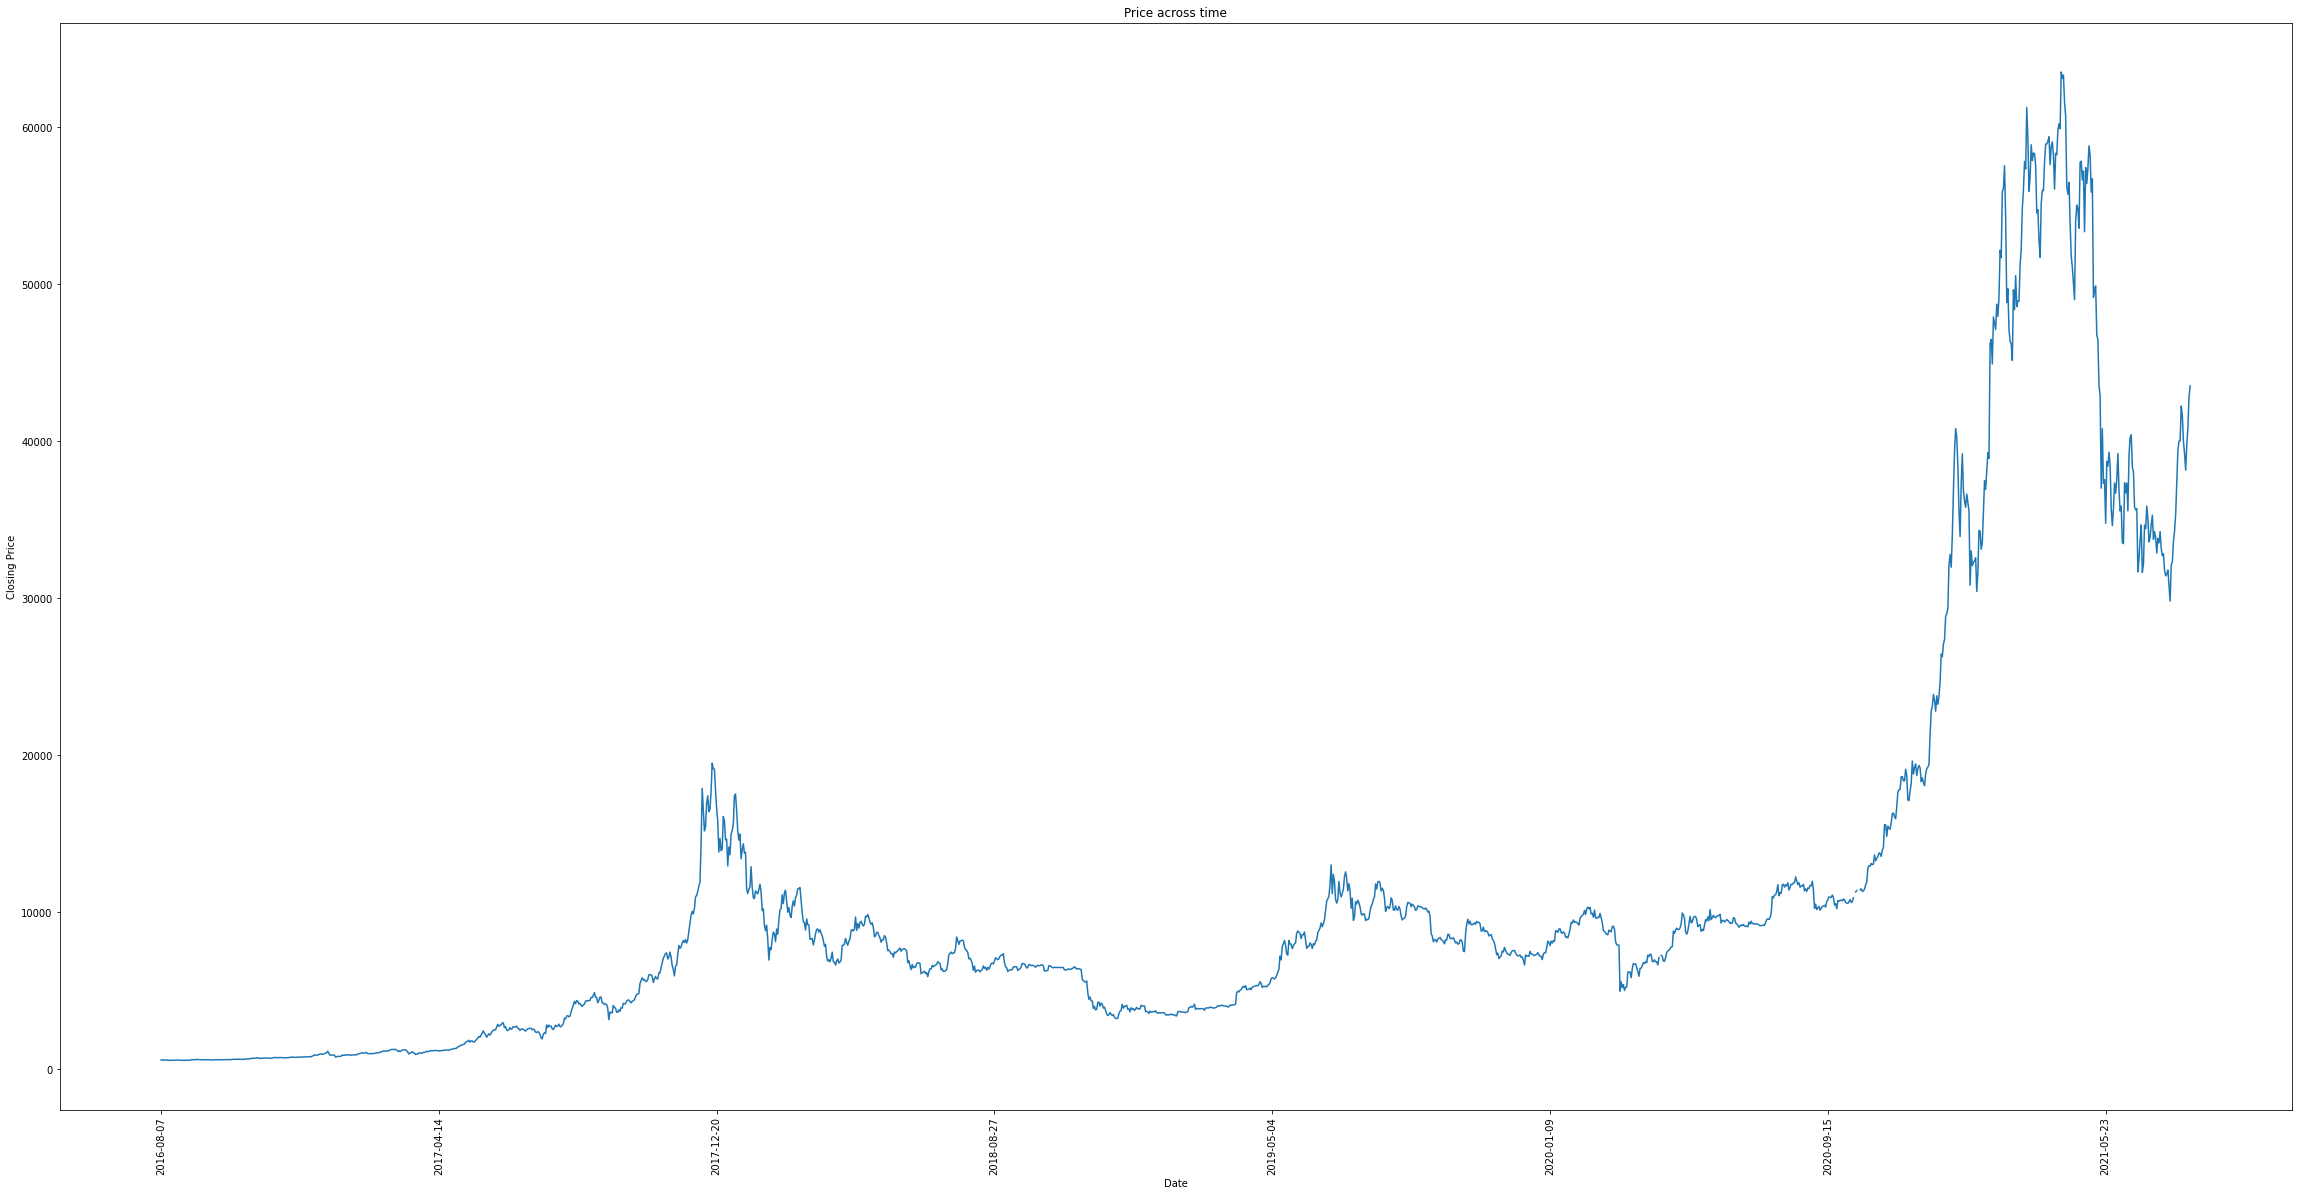

In [ ]:
#BTC Price Trend
ax = btc_prices.groupby(['Date'])['Close'].mean().plot()
ax.set_ylabel("Closing Price")
plt.title("Price across time")
plt.xticks(rotation= 90)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]), <a list of 10 Text major ticklabel objects>)

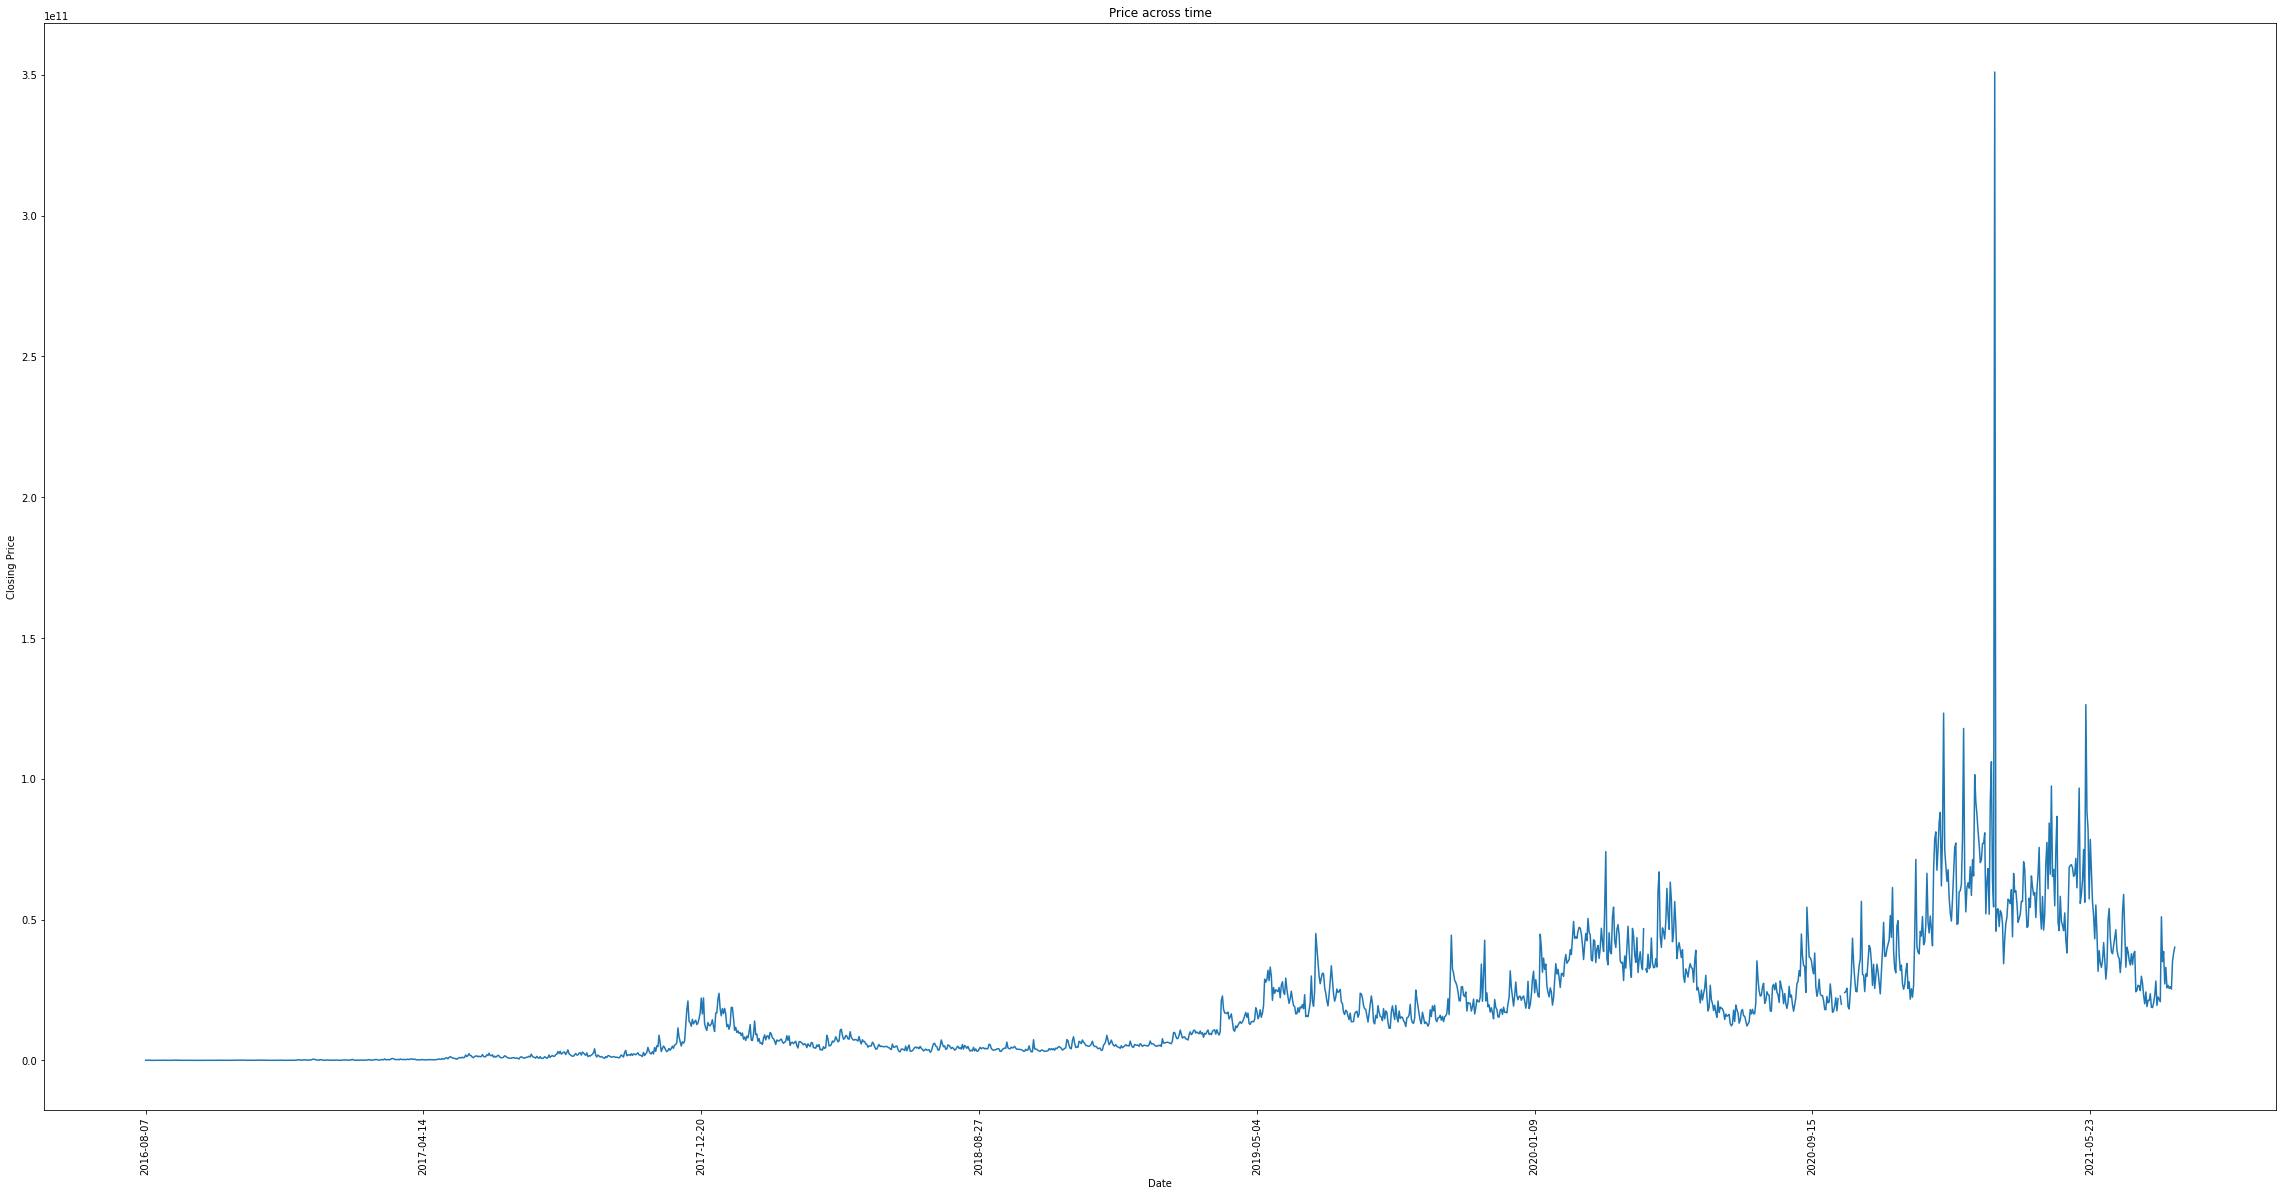

In [ ]:
#BTC Volume Trend
ax = btc_prices.groupby(['Date'])['Volume'].mean().plot()
ax.set_ylabel("Closing Price")
plt.title("Price across time")
plt.xticks(rotation= 90)

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(wide_format[top_5_currency_names].corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

NameError: ignored

<Figure size 1008x576 with 0 Axes>

In [ ]:
#pairwise correlation between prices

plt.figure(figsize=(12,6))
sns.heatmap(btc_prices.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between indicators')

# Sentiment Analysis (using TextBlob)

In [ ]:
from textblob import TextBlob

In [ ]:
btc_headlines.tail(10)


,Unnamed: 0,date,headline,headline_clean
246941,239668,20210817,Crypto Exchange Bitpanda Raises $263M at $4.1B...,crypto exchange bitpanda raise m at b valuation
246942,239674,20210817,"BIT Mining Revenue Rises $440M in Q2, Thanks t...",bit mining revenue rise m in q thanks to btc c...
246943,239667,20210817,Eqonex Launches Peer-to-Peer Crypto Lending Ma...,eqonex launch peer to peer crypto lending mark...
246944,239675,20210817,Galaxy Digital Files for US Bitcoin Futures ETF,galaxy digital file for u bitcoin future etf
246945,223084,20210817,Big Three Credit Agency Fitch Warns El Salvado...,big three credit agency fitch warns el salvado...
246946,229463,20210817,"Solana Captures Fresh All-Time Highs, SOL Join...",solana capture fresh all time high sol join th...
246947,229464,20210817,Polygon Enters Into Africa With Quidax. Quidax...,polygon enters into africa with quidax quidax ...
246948,229465,20210817,Bank of Ghana Urged to Resist Developing a CBD...,bank of ghana urged to resist developing a cbd...
246949,229466,20210817,Venezuelan Buys Apartment Using Tether as Real...,venezuelan buy apartment using tether a real e...
246950,229467,20210817,Former Zcash Developer to Lead Twitterâ€™s Dec...,former zcash developer to lead twitter s decen...


In [ ]:
def blob_polarity(text):
    return TextBlob(text).sentiment.polarity

def blob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
blob_polarity("support")

0.0

In [ ]:
btc_headlines["sentiment"]= btc_headlines["headline_clean"].apply(blob_subjectivity)
btc_headlines["polarity"]= btc_headlines["headline_clean"].apply(blob_polarity)


In [ ]:
btc_headlines.tail(15)

,Unnamed: 0,date,headline,headline_clean,sentiment,polarity
246936,229477,20210816,Darknet Users Leverage a New Blockchain Analyt...,darknet user leverage a new blockchain analyti...,0.502273,-0.131818
246937,239666,20210817,Bitcoin Rangebound Near $50K Resistance; Suppo...,bitcoin rangebound near k resistance support at k,0.400000,0.100000
246938,239670,20210817,Spanish Securities Watchdog Warns 12 Firms Inc...,spanish security watchdog warns firm including...,0.200000,-0.100000
246939,239673,20210817,AUDIO Market Cap Surges Past $1B After TikTok-...,audio market cap surge past b after tiktok aud...,0.250000,-0.250000
246940,239669,20210817,Bitcoin Showing Signs of â€˜Short-Term Fatigue...,bitcoin showing sign of short term fatigue nea...,0.566667,0.033333
246941,239668,20210817,Crypto Exchange Bitpanda Raises $263M at $4.1B...,crypto exchange bitpanda raise m at b valuation,0.000000,0.000000
246942,239674,20210817,"BIT Mining Revenue Rises $440M in Q2, Thanks t...",bit mining revenue rise m in q thanks to btc c...,0.200000,0.200000
246943,239667,20210817,Eqonex Launches Peer-to-Peer Crypto Lending Ma...,eqonex launch peer to peer crypto lending mark...,0.000000,0.000000
246944,239675,20210817,Galaxy Digital Files for US Bitcoin Futures ETF,galaxy digital file for u bitcoin future etf,0.062500,0.000000
246945,223084,20210817,Big Three Credit Agency Fitch Warns El Salvado...,big three credit agency fitch warns el salvado...,0.250000,-0.150000


## Sentiment Analysis using FinBert

In [ ]:
!git clone https://gist.github.com/c1a8c0359fbde2f6dcb92065b8ffc5e3.git

Cloning into 'c1a8c0359fbde2f6dcb92065b8ffc5e3'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), done.


In [ ]:
import pandas

btc_headlines.tail(5)

,Unnamed: 0,date,headline,headline_clean
246946,229463,20210817,"Solana Captures Fresh All-Time Highs, SOL Join...",solana capture fresh all time high sol join th...
246947,229464,20210817,Polygon Enters Into Africa With Quidax. Quidax...,polygon enters into africa with quidax quidax ...
246948,229465,20210817,Bank of Ghana Urged to Resist Developing a CBD...,bank of ghana urged to resist developing a cbd...
246949,229466,20210817,Venezuelan Buys Apartment Using Tether as Real...,venezuelan buy apartment using tether a real e...
246950,229467,20210817,Former Zcash Developer to Lead Twitterâ€™s Dec...,former zcash developer to lead twitter s decen...
